In [6]:
import numba as nb 
import numpy as np 
import matplotlib.pyplot as plt

In [7]:
from poison2dsolver import PoissonSolver4

PS = PoissonSolver4(beta=0.4, d=0.001)

In [8]:
iterations = 500
S_array = np.zeros(iterations)
for i in range(iterations):
    S_array[i] = PS.s_conv()
    PS.update()

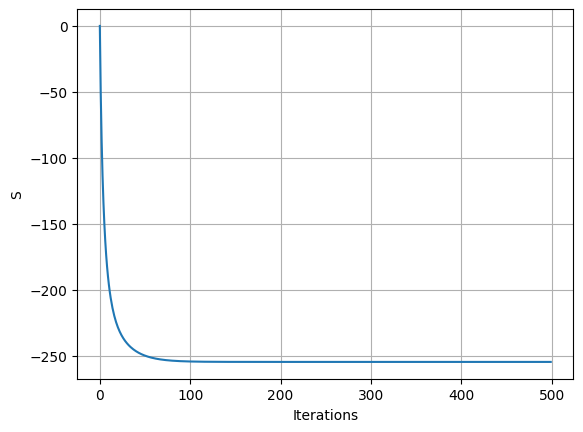

In [10]:
plt.plot(np.arange(iterations), S_array)
plt.xlabel("Iterations")
plt.ylabel("S")
plt.grid()
plt.show()

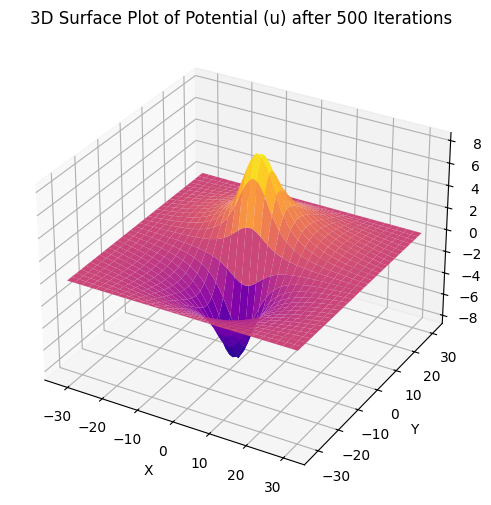

In [11]:
from matplotlib import colors

# Setting a consistent normalization for both plots
norm = colors.TwoSlopeNorm(vmin=-np.max(PS.u_grid), vcenter=0, vmax=np.max(PS.u_grid))


#Plot the u_grid after 500 iterations
x = np.linspace(-PS.size//2, PS.size//2, PS.size)
y = np.linspace(-PS.size//2, PS.size//2, PS.size)
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, PS.u_grid, cmap='plasma', edgecolor='none', norm=norm)
ax.set_title(f'3D Surface Plot of Potential (u) after {PS.nr_iterations} Iterations')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Potential (u)')
plt.show()